<a href="https://colab.research.google.com/github/YuvrajRakheja/House-Price-Kaggle/blob/main/Kaggle_House_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 ! mkdir ~/.kaggle

In [2]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [3]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [4]:
! kaggle competitions download house-prices-advanced-regression-techniques

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [5]:
!cp kaggle.json ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory


In [6]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [7]:
! unzip house-prices-advanced-regression-techniques.zip

unzip:  cannot find or open house-prices-advanced-regression-techniques.zip, house-prices-advanced-regression-techniques.zip.zip or house-prices-advanced-regression-techniques.zip.ZIP.


In [8]:
#importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf 
from scipy import stats
from scipy.stats import norm, skew

In [10]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


In [11]:
train.head(5)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
test.head(5)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [13]:
#Drop the  'Id' column since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [14]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


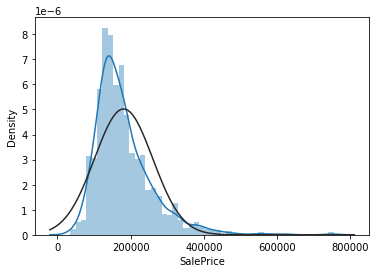

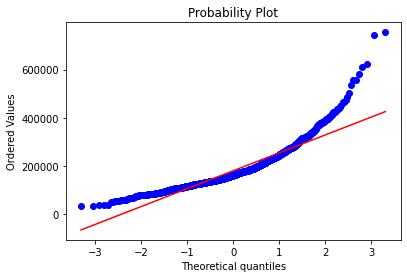

In [15]:
sns.distplot(train['SalePrice'], fit=norm);

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

In [16]:
train['SalePrice'] = np.log(train['SalePrice'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


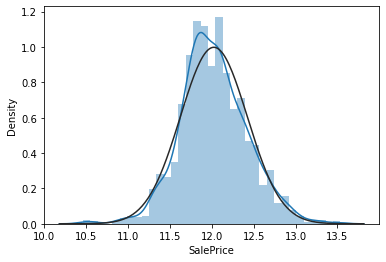

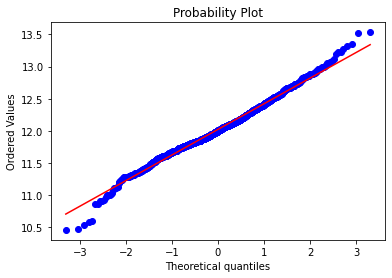

In [17]:
sns.distplot(train['SalePrice'], fit=norm);

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
#Plot after transformation

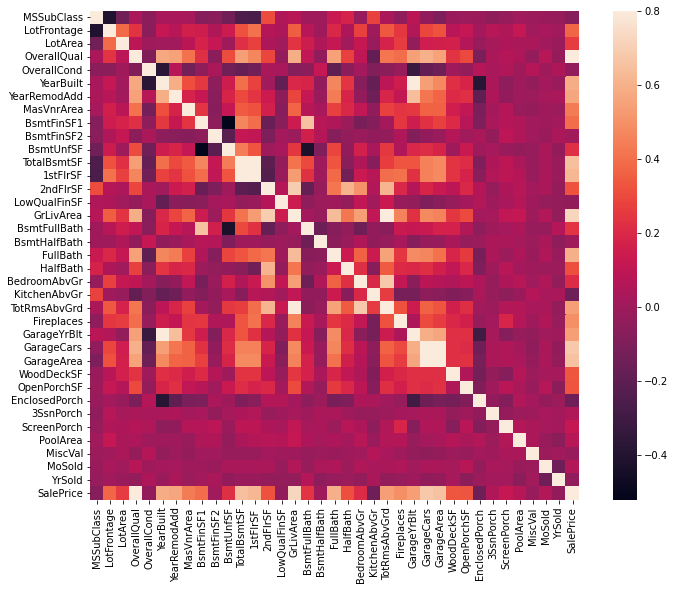

In [18]:
#corr matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Text(0.5, 1.0, 'House Price vs YearSold')

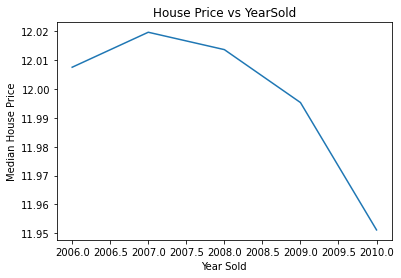

In [19]:
# Chekcing if the median price changes with the year sold
train['YrSold'] = train['YrSold'].astype('int')
train.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

Data Preparation


In [20]:
# Creating a new Column to determine the age of the property
train['age']=train['YrSold']-train['YearBuilt']
train['garage_age']=train['YrSold']-train['GarageYrBlt']
train['remodel_age']=train['YrSold']-train['YearRemodAdd']

train.drop('GarageYrBlt',axis=1,inplace=True)

In [21]:
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1458 non-null   int64  
 1   MSZoning       1458 non-null   object 
 2   LotFrontage    1199 non-null   float64
 3   LotArea        1458 non-null   int64  
 4   Street         1458 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1458 non-null   object 
 7   LandContour    1458 non-null   object 
 8   Utilities      1458 non-null   object 
 9   LotConfig      1458 non-null   object 
 10  LandSlope      1458 non-null   object 
 11  Neighborhood   1458 non-null   object 
 12  Condition1     1458 non-null   object 
 13  Condition2     1458 non-null   object 
 14  BldgType       1458 non-null   object 
 15  HouseStyle     1458 non-null   object 
 16  OverallQual    1458 non-null   int64  
 17  OverallCond    1458 non-null   int64  
 18  YearBuil

In [22]:
# Converting the Year to String since they are categorical features and should not be treated as numerical features
train[['MSSubClass']] = train[['MSSubClass']].astype(str) 
train['YrSold'] = train['YrSold'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)
train['OverallCond'] = train['OverallCond'].astype(str)


Handling missing values

In [23]:
print(round(train.isnull().sum()/len(train.index)*100,2).sort_values(ascending=False)[ round(train.isnull().sum()/len(train.index),2) > 0 ] )


PoolQC          99.59
MiscFeature     96.30
Alley           93.76
Fence           80.73
FireplaceQu     47.33
LotFrontage     17.76
GarageCond       5.56
garage_age       5.56
GarageFinish     5.56
GarageType       5.56
GarageQual       5.56
BsmtExposure     2.61
BsmtFinType2     2.61
BsmtQual         2.54
BsmtCond         2.54
BsmtFinType1     2.54
MasVnrArea       0.55
MasVnrType       0.55
dtype: float64


In [24]:
# Fill the values with '0' which have that as the most appropriate choice

cols=["MasVnrArea", "BsmtUnfSF", "TotalBsmtSF", "GarageCars", "BsmtFinSF2", "BsmtFinSF1", "GarageArea","garage_age"]
for col in cols:
    train[col].fillna(0, inplace=True)

In [25]:
# Fill the values with 'None' which have that as the most appropriate choice (categorical features)

cols1 = ["PoolQC" , "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageQual", "GarageCond", "GarageFinish", "GarageType", "BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType2", "BsmtFinType1", "MasVnrType"]
for col in cols1:
    train[col].fillna("None", inplace=True)

In [26]:
# Fill the values with the mode which have that as the most appropriate choice
cols2 = ["MSZoning", "BsmtFullBath", "BsmtHalfBath", "Utilities", "Functional", "Electrical", "KitchenQual", "SaleType","Exterior1st", "Exterior2nd"]
for col in cols2:
    train[col].fillna(train[col].mode()[0], inplace=True)

In [27]:
train.isna().sum()[train.isnull().sum()>0]

LotFrontage    259
dtype: int64

In [28]:
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
#Replacing with median of neighbourhood

In [29]:
#Encode categorical values

from sklearn.preprocessing import LabelEncoder
col = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

# process columns, apply LabelEncoder to categorical features
for c in col:
    lbl = LabelEncoder() 
    lbl.fit(list(train[c].values)) 
    train[c] = lbl.transform(list(train[c].values))

# shape        
print('Shape all_data: {}'.format(train.shape))


Shape all_data: (1458, 82)


In [30]:
numeric_feats = train.dtypes[train.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,24.434913
PoolArea,15.932532
LotArea,12.560986
3SsnPorch,10.286510
LowQualFinSF,8.995688
LandSlope,4.805032
KitchenAbvGr,4.480268
BsmtFinSF2,4.247550
ScreenPorch,4.114690
BsmtHalfBath,4.095895


In [31]:
skewness = skewness[abs(skewness) > 0.75]

# Correct the skewness with boxcox1p
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    train[feat] = boxcox1p(train[feat], lam)

In [32]:
train = pd.get_dummies(train)

Model training

In [34]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone


In [35]:
# Define a grid search method for parameter tuning

def grid_get(model, X, y, param_grid):
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring="neg_mean_squared_error")
        grid_search.fit(X,y)
        print(grid_search.best_params_, np.sqrt(-grid_search.best_score_))

In [36]:
y_train = train.SalePrice.values
param_grid={'alpha':[0.2,0.3,0.4,0.5,0.6], 'kernel':["polynomial"], 'degree':[1,2,3],'coef0':[1,1.5,2,2.5,3]}
grid_get(KernelRidge(), train.values, y_train, param_grid)

{'alpha': 0.2, 'coef0': 3, 'degree': 2, 'kernel': 'polynomial'} 0.012902422149170235


In [37]:
#Parameter tuning for Support Vector regression

param_grid={'C':[11,13,15],'kernel':["rbf"],"gamma":[0.0003,0.0004],"epsilon":[0.008,0.009]}
grid_get(SVR(), train.values, y_train, param_grid)

{'C': 11, 'epsilon': 0.008, 'gamma': 0.0003, 'kernel': 'rbf'} 0.013320552057739037


In [38]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv=n_folds))
    return(rmse)

In [39]:
Svr = make_pipeline(RobustScaler(), SVR(gamma= 0.0003, kernel='rbf', C=15, epsilon=0.008))
score = rmsle_cv(Svr)
#svm
print("Support Vector Regression score: {:.4f})\n".format(score.mean()))


Support Vector Regression score: 0.0048)



In [40]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

score = rmsle_cv(model_xgb)

In [41]:
print("XG Boost score: {:.4f})\n".format(score.mean()))

XG Boost score: 0.0153)

